<a href="https://colab.research.google.com/github/BruceGabr/Neurokup-III/blob/main/notebooks/01_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar kaggle

In [ ]:
!pip install kaggle

## Configurar variables de entorno para conectar con kaggle

In [20]:
# ========== LIMPIAR Y CONFIGURAR CORRECTAMENTE ==========
import os
import json

# 1. Leer las credenciales CORRECTAS del archivo
with open('/root/.kaggle/kaggle.json', 'r') as f:
    config = json.load(f)

print(f"📄 Credenciales del archivo:")
print(f"   Username: {config['username']}")
print(f"   Key: {config['key'][:10]}...")

# 2. SOBRESCRIBIR las variables de entorno con las correctas
os.environ['KAGGLE_USERNAME'] = config['username']
os.environ['KAGGLE_KEY'] = config['key']

print(f"\n✅ Variables de entorno actualizadas:")
print(f"   KAGGLE_USERNAME: {os.environ['KAGGLE_USERNAME']}")
print(f"   KAGGLE_KEY: {os.environ['KAGGLE_KEY'][:10]}...")

# 3. Probar conexión
print("\n🧪 Probando conexión con Kaggle...")
!kaggle competitions list | head -5

📄 Credenciales del archivo:
   Username: brucemg
   Key: 64447ea1c0...

✅ Variables de entorno actualizadas:
   KAGGLE_USERNAME: brucemg
   KAGGLE_KEY: 64447ea1c0...

🧪 Probando conexión con Kaggle...
ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd       1048           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           200,000 Usd        483           False  
https://www.kaggle.com/competitions/google-tunix-hackathon                          2026-01-12 23:59:00  Featured           100,000 Usd    

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brucemg","key":"757ebb01ead755d42827b174f005c118"}'}

In [19]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [21]:
!kaggle config view



Configuration values from /root/.kaggle
- username: brucemg
- path: None
- proxy: None
- competition: None


## Descargar archivos necesarios de kaggle

In [ ]:
!kaggle competitions download -c neuro-kup-iii-beta
!unzip neuro-kup-iii-beta.zip

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/download-all/neuro-kup-iii-beta
Archive:  neuro-kup-iii-beta.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test_private.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test_public.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls

neuro-kup-iii-beta.zip	sample_submission.csv  test_private.csv  train.csv
sample_data		submission_v1.csv      test_public.csv


# EDA BÁSICO

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test_private = pd.read_csv('test_private.csv')
test_public = pd.read_csv('test_public.csv')

In [ ]:
print(train.shape)
print(test_public.shape)
print(test_private.shape)

(36168, 21)
(4521, 21)
(4522, 20)


In [ ]:
train.columns

Index(['id', 'nombre', 'apellido', 'DNI', 'año_nacimiento', 'trabajo',
       'estado_civil', 'educación', 'riesgo_crediticio',
       'fondos_promedio_anual', 'hipoteca', 'deuda_personal', 'incumplimiento',
       'contacto', 'fecha', 'duracion', 'campaña', 'p_dias',
       'contactos_previos', 'p_resultado', 'y'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     36168 non-null  int64  
 1   nombre                 36168 non-null  object 
 2   apellido               36168 non-null  object 
 3   DNI                    36168 non-null  int64  
 4   año_nacimiento         36168 non-null  int64  
 5   trabajo                36168 non-null  object 
 6   estado_civil           36168 non-null  object 
 7   educación              36168 non-null  object 
 8   riesgo_crediticio      36168 non-null  object 
 9   fondos_promedio_anual  36168 non-null  float64
 10  hipoteca               36168 non-null  object 
 11  deuda_personal         36168 non-null  object 
 12  incumplimiento         36168 non-null  object 
 13  contacto               36168 non-null  object 
 14  fecha                  36168 non-null  object 
 15  du

In [ ]:
display(train["y"].value_counts())
train["y"].value_counts(normalize=True) * 100

,count
y,
no,31970
si,4198


,proportion
y,
no,88.393055
si,11.606945


In [ ]:
train.isnull().sum().sort_values(ascending=False)

,0
id,0
nombre,0
apellido,0
DNI,0
año_nacimiento,0
trabajo,0
estado_civil,0
educación,0
riesgo_crediticio,0
fondos_promedio_anual,0


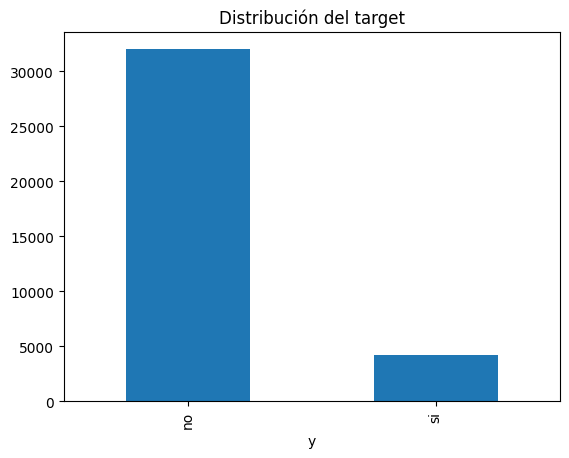

In [ ]:
import matplotlib.pyplot as plt

train["y"].value_counts().plot(kind="bar")
plt.title("Distribución del target")
plt.show()

# PREPROCESAMIENTO

## Limpiar columnas

In [ ]:
train_copy = train.copy()
test_private_copy = test_private.copy()
test_public_copy = test_public.copy()

In [ ]:
import re

def duracion_a_segundos(x):
    if pd.isna(x):
        return 0

    x = str(x)
    minutos = re.search(r"(\d+)\s*m", x)
    segundos = re.search(r"(\d+)\s*s", x)

    m = int(minutos.group(1)) if minutos else 0
    s = int(segundos.group(1)) if segundos else 0

    return m * 60 + s

def limpiar_p_dias(x):
    if str(x).lower() == "nunca":
        return -1
    return int(x)

In [ ]:
def pre_process(df):
  drop_cols = ["id", "nombre", "apellido", "DNI"]
  df_copy = df.drop(columns=drop_cols)
  df_copy["duracion"] = df_copy["duracion"].apply(duracion_a_segundos)
  df_copy["p_dias"] = df_copy["p_dias"].apply(limpiar_p_dias)

  return df_copy


In [ ]:
train_copy = pre_process(train_copy)
test_private_copy = pre_process(test_private_copy)
test_public_copy = pre_process(test_public_copy)

In [ ]:
test_public_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   año_nacimiento         4521 non-null   int64  
 1   trabajo                4521 non-null   object 
 2   estado_civil           4521 non-null   object 
 3   educación              4521 non-null   object 
 4   riesgo_crediticio      4521 non-null   object 
 5   fondos_promedio_anual  4521 non-null   float64
 6   hipoteca               4521 non-null   object 
 7   deuda_personal         4521 non-null   object 
 8   incumplimiento         4521 non-null   object 
 9   contacto               4521 non-null   object 
 10  fecha                  4521 non-null   object 
 11  duracion               4521 non-null   int64  
 12  campaña                4521 non-null   int64  
 13  p_dias                 4521 non-null   int64  
 14  contactos_previos      4521 non-null   int64  
 15  p_re

In [ ]:
df = train_copy.copy()
df['y'] = df['y'].map({'si': 1, 'no': 0})
X = df.drop(columns=['y'])
y = df['y']

In [ ]:
y.value_counts()

,count
y,
0,31970
1,4198


In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Columns: 388 entries, año_nacimiento to p_resultado_éxito
dtypes: bool(382), float64(1), int64(5)
memory usage: 14.8 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5655226209048362

In [ ]:
# Save original ids for submission from the raw test dataframes
test_public_original_ids = test_public['id']
test_private_original_ids = test_private['id']

# Re-process test_public and test_private correctly
# At this point, `test_public_copy` has been pre_processed (dropped id, etc., cleaned duracion, p_dias) and still contains 'y'.
# `test_private_copy` has been pre_processed and does NOT contain 'y'.

# Prepare test_public for dummy encoding and prediction
test_public_for_dummies = test_public_copy.drop(columns=['y']).copy()

# Apply one-hot encoding to both test sets, aligning columns with X (training data)
# It's crucial to ensure the test data has the same columns as the training data after one-hot encoding
test_private_dummies = pd.get_dummies(test_private_copy, drop_first=True)
test_public_dummies = pd.get_dummies(test_public_for_dummies, drop_first=True)

# Align columns of test data with training data (X.columns)
missing_cols_private = set(X.columns) - set(test_private_dummies.columns)
for c in missing_cols_private:
    test_private_dummies[c] = 0
test_private_final = test_private_dummies[X.columns]

missing_cols_public = set(X.columns) - set(test_public_dummies.columns)
for c in missing_cols_public:
    test_public_dummies[c] = 0
test_public_final = test_public_dummies[X.columns]

# Concatenate for prediction
df_to_predict = pd.concat([test_private_final, test_public_final], ignore_index=True)

# Make predictions
predicciones = model.predict(df_to_predict)

# Combine original IDs in the same order as the concatenated prediction input
submission_ids = pd.concat([test_private_original_ids, test_public_original_ids], ignore_index=True)

# Create submission DataFrame
submission_v1 = pd.DataFrame({
    "id": submission_ids,
    "y": ['si' if p == 1 else 'no' for p in predicciones]
})

print("\n--- Predicciones para nuevos datos ---")
submission_v1


--- Predicciones para nuevos datos ---


,id,y
0,15738,no
1,35463,no
2,16904,no
3,1866,no
4,31271,no
...,...,...
9038,2917,no
9039,2229,no
9040,7963,no
9041,42431,si


In [ ]:
submission_v1.to_csv('submission_v1.csv', index=False)

In [ ]:
display(pd.read_csv("submission_v1.csv"))

,id,y
0,15738,no
1,35463,no
2,16904,no
3,1866,no
4,31271,no
...,...,...
9038,2917,no
9039,2229,no
9040,7963,no
9041,42431,si


In [ ]:
!kaggle competitions submit -c neuro-kup-iii-beta -f submission_v1.csv -m "Submission_v1 Logistic Regression"

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/submission-url


In [ ]:
!kaggle competitions list


401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/list?page=1
